In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import os

#STEP 1.DATA PREPARATION
Income_data = pd.read_csv(r"C:\Users\Test\OneDrive\Desktop\Global Income Dataset\global_income_inequality.csv")
Income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      360 non-null    object 
 1   Year                         360 non-null    int64  
 2   Population                   360 non-null    int64  
 3   Gini Index                   360 non-null    float64
 4   Average Income (USD)         360 non-null    float64
 5   Top 10% Income Share (%)     360 non-null    float64
 6   Bottom 10% Income Share (%)  360 non-null    float64
 7   Income Group                 360 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 22.6+ KB


In [2]:
Income_data.head()

,Country,Year,Population,Gini Index,Average Income (USD),Top 10% Income Share (%),Bottom 10% Income Share (%),Income Group
0,United States,2000,30072337,0.333105,37106.735536,30.780946,1.096329,High Income
1,United States,2001,15189465,0.508761,16250.105075,54.563475,1.441728,Low Income
2,United States,2002,89001835,0.229093,40069.586399,37.200666,1.374502,High Income
3,United States,2003,297595139,0.230673,1233.469995,40.453246,4.493424,Lower Middle Income
4,United States,2004,23680558,0.544657,22950.248061,45.343660,3.250805,High Income


In [3]:
Income_data.tail()

,Country,Year,Population,Gini Index,Average Income (USD),Top 10% Income Share (%),Bottom 10% Income Share (%),Income Group
355,Saudi Arabia,2019,76352940,0.298362,22142.286345,27.316935,4.168030,High Income
356,Saudi Arabia,2020,59947230,0.300902,23503.216793,51.791266,1.842205,Low Income
357,Saudi Arabia,2021,8614363,0.470990,44303.921142,24.308291,1.967456,Low Income
358,Saudi Arabia,2022,210722601,0.210066,56770.870968,42.414258,2.048774,Low Income
359,Saudi Arabia,2023,165396943,0.364157,65251.308768,30.817990,2.179214,Lower Middle Income


In [4]:
Income_data.describe()

,Year,Population,Gini Index,Average Income (USD),Top 10% Income Share (%),Bottom 10% Income Share (%)
count,360.000000,3.600000e+02,360.000000,360.000000,360.000000,360.000000
mean,2011.500000,1.722251e+08,0.425757,35433.844535,40.200676,2.992700
std,6.931821,1.016954e+08,0.128095,20425.341602,11.495312,1.147626
min,2000.000000,5.493471e+06,0.200285,1031.459111,20.053225,1.022658
25%,2005.750000,7.873280e+07,0.317949,18655.898805,30.485922,1.994917
50%,2011.500000,1.754913e+08,0.429615,34470.820155,40.391369,2.975537
75%,2017.250000,2.541225e+08,0.538850,54259.988739,49.920101,4.025345
max,2023.000000,3.491768e+08,0.645261,69732.712622,59.939168,4.986443


In [9]:
Income_data.shape

(360, 8)

In [11]:
#Checking for missing Values

Income_data.isnull().sum()

Country                        0
Year                           0
Population                     0
Gini Index                     0
Average Income (USD)           0
Top 10% Income Share (%)       0
Bottom 10% Income Share (%)    0
Income Group                   0
dtype: int64

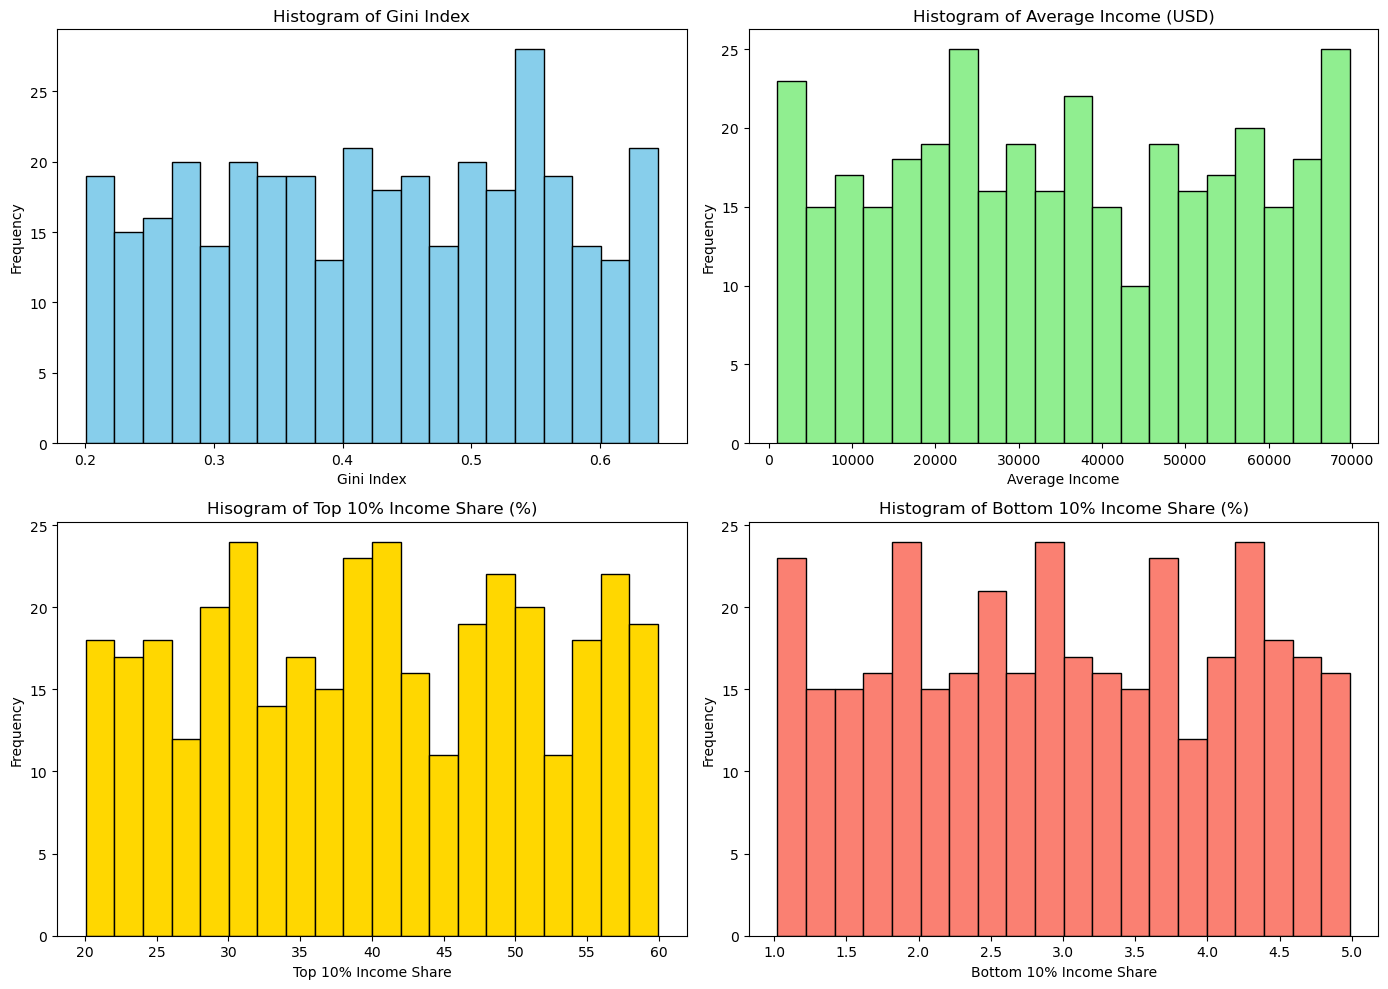

In [13]:
# STEP 2:VISUALIZATION

#1. Distribution of numeric columns like Gini Index, Average Income, Income Share percentage

#Plotting

fig, ax = plt.subplots(2, 2, figsize =(14,10))

#Histogram for Gini Index
ax[0,0].hist(Income_data['Gini Index'],bins = 20,color ='skyblue', edgecolor= 'black')
ax[0,0].set_title('Histogram of Gini Index')
ax[0,0].set_xlabel('Gini Index')
ax[0,0].set_ylabel('Frequency')

#histogram for Average Income(USD)
ax[0,1].hist(Income_data['Average Income (USD)'], bins = 20, color ='lightgreen', edgecolor= 'black')
ax[0,1].set_title('Histogram of Average Income (USD)')
ax[0,1].set_xlabel('Average Income')
ax[0,1].set_ylabel('Frequency')

#histogram for Top 10% Income Share(%)
ax[1,0].hist(Income_data['Top 10% Income Share (%)'], bins= 20, color= 'gold', edgecolor= 'black')
ax[1,0].set_title('Hisogram of Top 10% Income Share (%)')
ax[1,0].set_xlabel('Top 10% Income Share')
ax[1,0].set_ylabel('Frequency')

#histogram for Bottom 10% Income Share(%)
ax[1,1].hist(Income_data['Bottom 10% Income Share (%)'], bins= 20, color= 'salmon', edgecolor= 'black')
ax[1,1].set_title('Histogram of Bottom 10% Income Share (%)')
ax[1,1].set_xlabel('Bottom 10% Income Share')
ax[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
#3. FEATURE ENGINEERING

#Polarized Index, Gini Index Change, Income Group Shift

Income_data['Polarization Index'] = Income_data['Top 10% Income Share (%)'] / Income_data['Bottom 10% Income Share (%)']

#Sort data to correctly calculate changes over time
Income_data.sort_values(by= ['Country', 'Year'], inplace =True)

Income_data['Gini Index Change'] = Income_data.groupby('Country')['Gini Index'].diff()

Income_data['Income Group Shift'] = Income_data.groupby('Country')['Income Group'].shift(1) != Income_data['Income Group']

Income_data[['Year', 'Country', 'Income Group', 'Gini Index', 'Polarization Index', 'Gini Index Change', 'Income Group Shift']].head()  

,Year,Country,Income Group,Gini Index,Polarization Index,Gini Index Change,Income Group Shift
312,2000,Australia,Upper Middle Income,0.396606,10.455919,NaN,True
313,2001,Australia,Upper Middle Income,0.269469,8.019077,-0.127137,False
314,2002,Australia,High Income,0.520715,15.318624,0.251246,True
315,2003,Australia,Low Income,0.285495,29.162135,-0.235220,True
316,2004,Australia,Lower Middle Income,0.461273,11.588262,0.175778,True


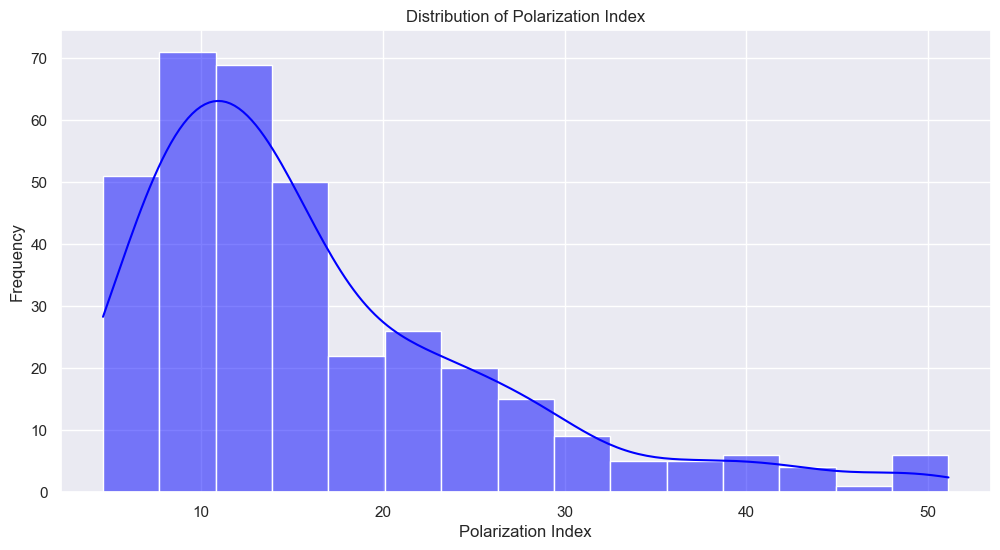

In [17]:
#STEP 4:EXPLORATORY DATA ANALYSIS (EDA)
sns.set(style= 'darkgrid')

#plotting the distribution of the Polarization Index

plt.figure(figsize=(12,6))

sns.histplot(Income_data['Polarization Index'], kde= True, color= 'blue')
plt.title('Distribution of Polarization Index')
plt.xlabel('Polarization Index')
plt.ylabel('Frequency')
plt.show()

#The distribution of Polarization Index is right-skewed, indicating that most countries have a lower ratio of top 10% to bottom 10% income shares, with a few outliers having very high polarization.

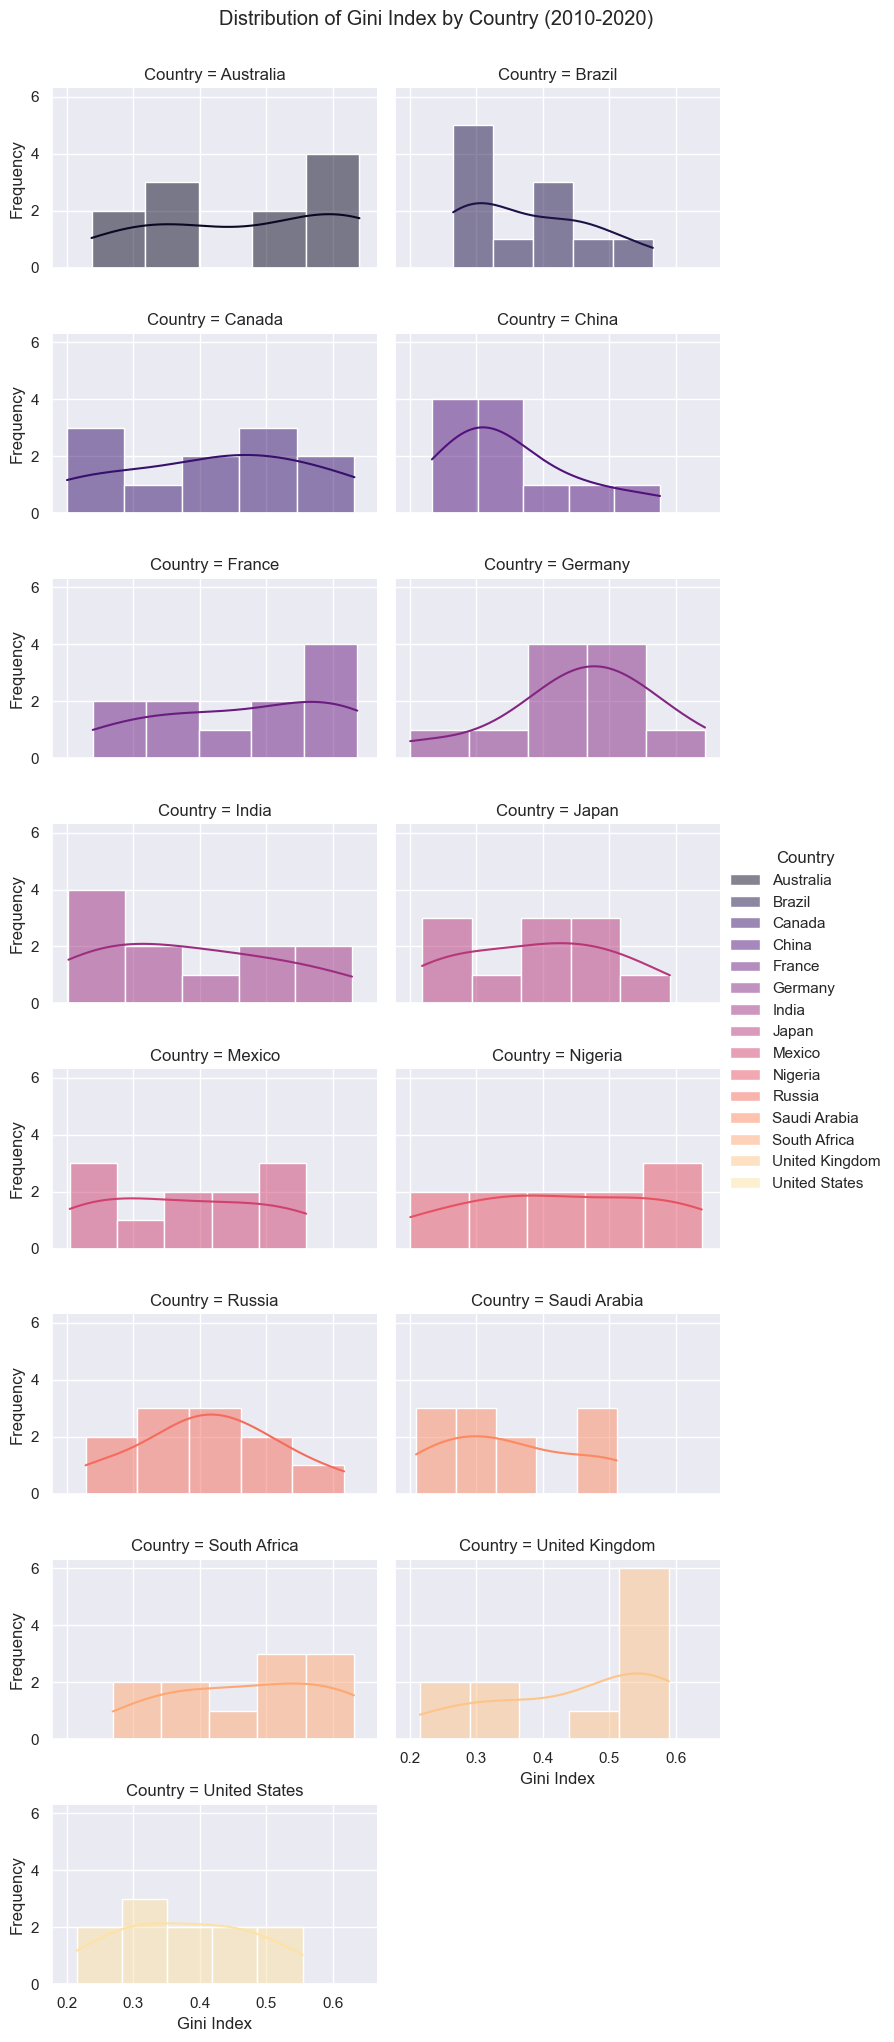

In [19]:
#Plotting the distribution of Gini Index Changes across all country

filtered_data = Income_data[(Income_data['Year'] >= 2010) & (Income_data['Year'] <= 2020)]

sns.set(style= 'darkgrid')

g = sns.FacetGrid(filtered_data, col = "Country", col_wrap=2, height=2.5, aspect= 1.5, hue= "Country", palette= "magma")
g.map(sns.histplot, "Gini Index", kde= True)

g.fig.suptitle('Distribution of Gini Index by Country (2010-2020)', y= 1.02)
g.set_axis_labels('Gini Index', 'Frequency')
g.add_legend(title = "Country")

plt.show()

C:\Users\Test\AppData\Local\Temp\ipykernel_15672\2326837582.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= shift_counts.index, y = shift_counts.values, palette = 'viridis')


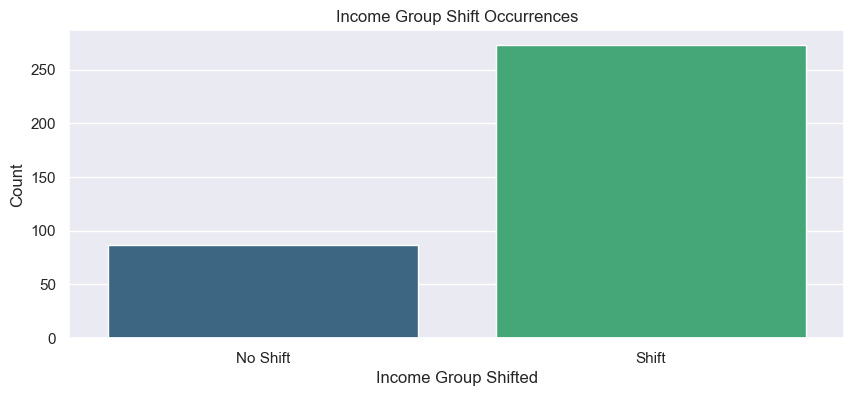

In [20]:
#Bar Plot for Income Group Shifts

plt.figure(figsize= (10,4))

shift_counts = Income_data['Income Group Shift'].value_counts()

sns.barplot(x= shift_counts.index, y = shift_counts.values, palette = 'viridis')
plt.title('Income Group Shift Occurrences')
plt.xlabel('Income Group Shifted')
plt.ylabel('Count')
plt.xticks([0,1], ['No Shift', 'Shift'])
plt.show()

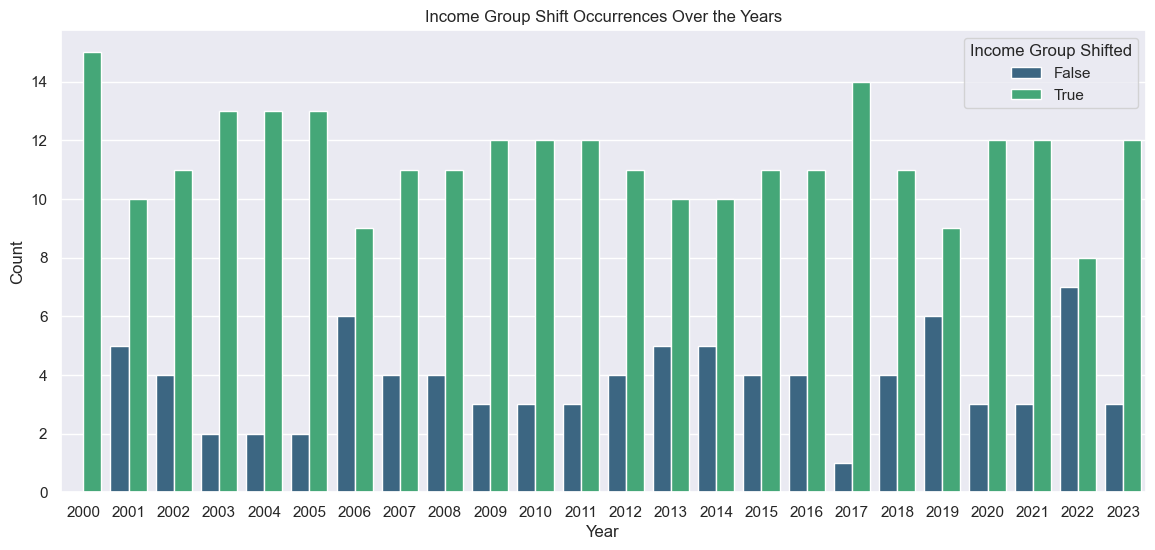

In [21]:
plt.figure(figsize=(14, 6))
sns.countplot(data=Income_data, x='Year', hue='Income Group Shift', palette='viridis')
plt.title('Income Group Shift Occurrences Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Income Group Shifted')
plt.show()

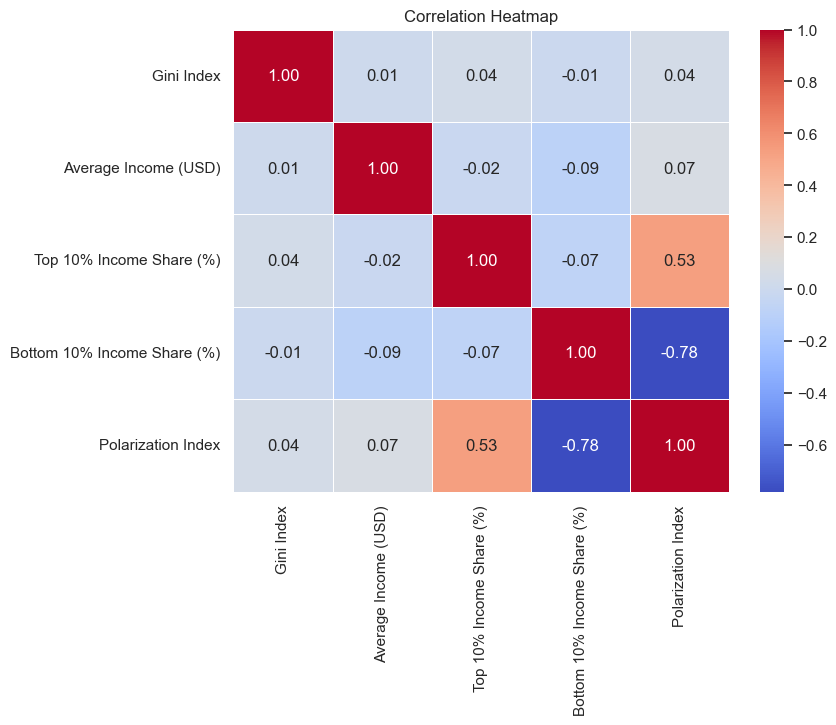

In [22]:
# Correlation

correlation_matrix = Income_data[['Gini Index', 'Average Income (USD)', 'Top 10% Income Share (%)', 'Bottom 10% Income Share (%)', 'Polarization Index']].corr()

#Plotting the heatmap

plt.figure(figsize= (8,6))
sns.heatmap(correlation_matrix, annot= True, cmap= 'coolwarm', linewidth= .5, fmt= ".2f")
plt.title('Correlation Heatmap')
plt.show()

In [23]:
#Setting Up for Regression Models

import statsmodels.api as sm

#Independant Variables
X= Income_data[['Top 10% Income Share (%)', 'Bottom 10% Income Share (%)']]
X= sm.add_constant(X)

y = Income_data['Gini Index']

model= sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Gini Index   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.2649
Date:                Sun, 27 Oct 2024   Prob (F-statistic):              0.767
Time:                        20:06:37   Log-Likelihood:                 229.74
No. Observations:                 360   AIC:                            -453.5
Df Residuals:                     357   BIC:                            -441.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4101      0.031     13.057      0.000       0.348       0.472
Top 10% Income Share (%)        0.0004      0.001      0.717      0.474      -0.001       0.002
Bottom 10% Income Share (%)    -0.0004      0.006     -0.075      0.941      -0.012       0.011
==============================================================================
Omnibus:                      165.171   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.615
Skew:                          -0.069   Prob(JB):                     3.34e-05
Kurtosis:                       1.836   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

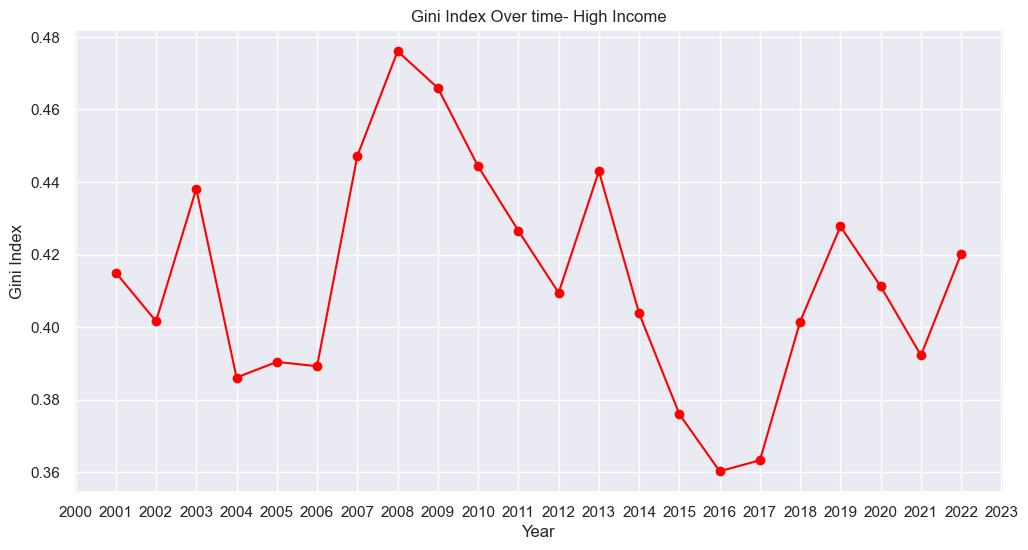

In [24]:
#Trend Analysis

#high Income
Income_data['Year'] = Income_data['Year'].astype(str)

Income_data.loc[Income_data['Income Group'] == 'High Income', 'Year'] = Income_data.loc[Income_data['Income Group'] == 'High Income', 'Year'].astype(str)
    
high_income_data = Income_data[Income_data['Income Group']== 'High Income']

# high_income_data['Year']= high_income_data['Year'].astype(str)
    
numeric_data= high_income_data.select_dtypes(include= [np.number])
    
grouped= numeric_data.groupby(high_income_data['Year']).mean().reset_index()
grouped['Smoothed_Gini']= grouped['Gini Index'].rolling(window=3, center= True).mean()
    
#Plotting
plt.figure(figsize=(12,6))
plt.plot(grouped['Year'], grouped['Smoothed_Gini'], marker= 'o', linestyle= '-', color= 'red')
plt.title('Gini Index Over time- High Income')
plt.xlabel('Year')
plt.ylabel('Gini Index')
plt.grid(True)
plt.show()

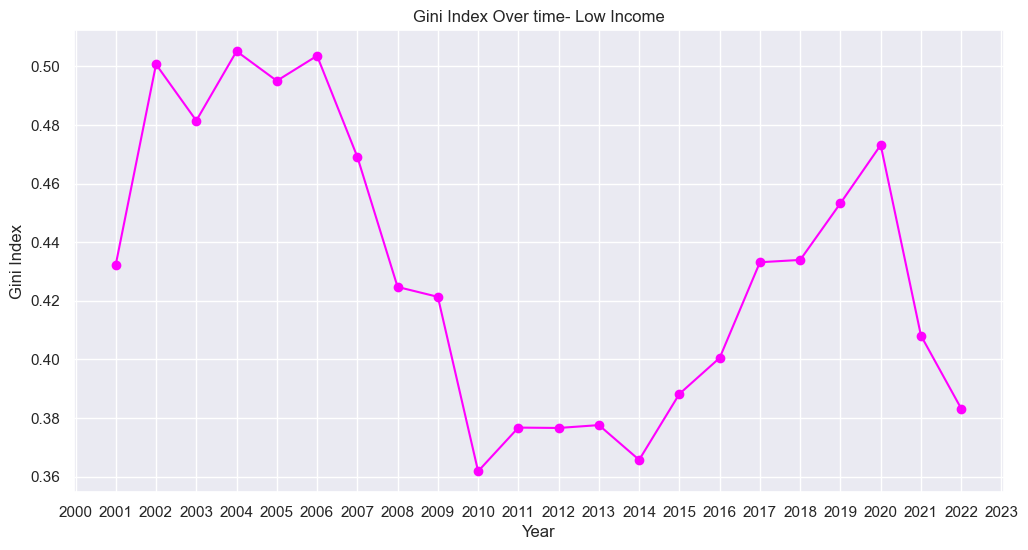

In [25]:
#Low Income

Income_data['Year']= Income_data['Year'].astype(str)

Income_data.loc[Income_data['Income Group']== 'Low Income', 'Year']= Income_data.loc[Income_data['Income Group']== 'Low Income', 'Year'].astype(str)

Low_income_data= Income_data[Income_data['Income Group']== 'Low Income']
Low_income_data

numeric_data_low= Low_income_data.select_dtypes(include= [np.number])

grouped_low= numeric_data_low.groupby(Low_income_data['Year']).mean().reset_index()
grouped_low['Smoothed_Gini_low']= grouped_low['Gini Index'].rolling(window= 3, center= True).mean()

#Plotting
plt.figure(figsize= (12,6))
plt.plot(grouped_low['Year'], grouped_low['Smoothed_Gini_low'], marker= 'o', linestyle= '-', color= 'magenta')
plt.title('Gini Index Over time- Low Income')
plt.xlabel('Year')
plt.ylabel('Gini Index')
plt.grid(True)
plt.show()

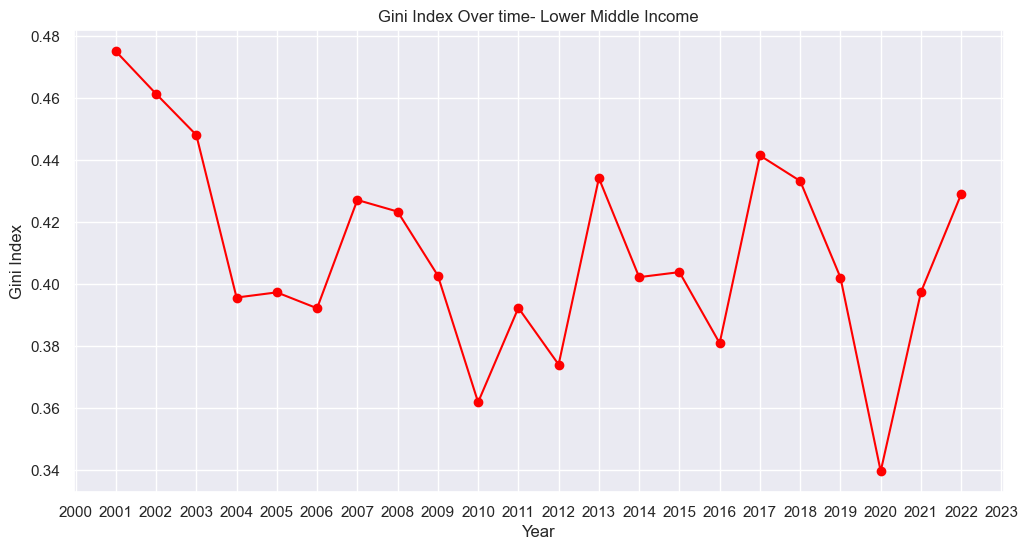

In [26]:
#Lower Middle Income

Income_data['Year']= Income_data['Year'].astype(str)

Income_data.loc[Income_data['Income Group']== 'Lower Middle Income', 'Year']= Income_data.loc[Income_data['Income Group']== 'Lower Middle Income', 'Year'].astype(str)

LowerM_Income_data= Income_data[Income_data['Income Group']== 'Lower Middle Income']
LowerM_Income_data

numeric_data_lowerm= LowerM_Income_data.select_dtypes(include= [np.number])

grouped_lowerm= numeric_data_lowerm.groupby(LowerM_Income_data['Year']).mean().reset_index()
grouped_lowerm['Smoothed_Gini_lowerM']= grouped_lowerm['Gini Index'].rolling(window= 3, center= True).mean()

#Plotting
plt.figure(figsize= (12,6))
plt.plot(grouped_lowerm['Year'], grouped_lowerm['Smoothed_Gini_lowerM'], marker= 'o', linestyle= '-', color= 'red')
plt.title('Gini Index Over time- Lower Middle Income')
plt.xlabel('Year')
plt.ylabel('Gini Index')
plt.grid(True)
plt.show()

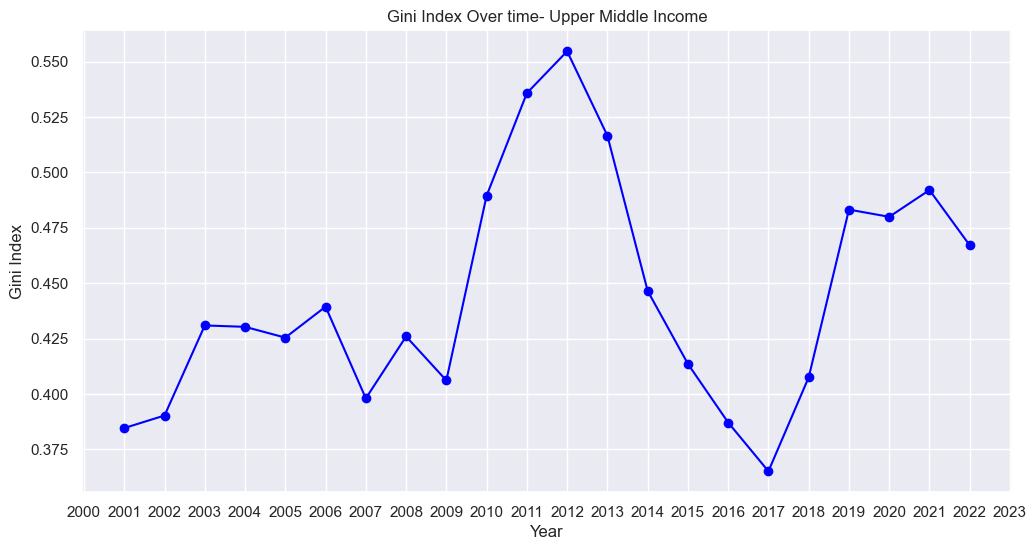

In [27]:
# Upper Middle Income
Income_data['Year']= Income_data['Year'].astype(str)

Income_data.loc[Income_data['Income Group']== 'Upper Middle Income', 'Year']= Income_data.loc[Income_data['Income Group']== 'Upper Middle Income', 'Year'].astype(str)

UpperM_Income_data= Income_data[Income_data['Income Group']== 'Upper Middle Income']

numeric_data_Upperm= UpperM_Income_data.select_dtypes(include= [np.number])

grouped_Upperm= numeric_data_Upperm.groupby(UpperM_Income_data['Year']).mean().reset_index()
grouped_Upperm['Smoothed_Gini_UpperM']= grouped_Upperm['Gini Index'].rolling(window= 3, center= True).mean()

#Plotting
plt.figure(figsize= (12,6))
plt.plot(grouped_Upperm['Year'], grouped_Upperm['Smoothed_Gini_UpperM'], marker= 'o', linestyle= '-', color= 'blue')
plt.title('Gini Index Over time- Upper Middle Income')
plt.xlabel('Year')
plt.ylabel('Gini Index')
plt.grid(True)
plt.show()